In this assignment we will see the power of Librosa and see that by writing a single line of code we can do wonders (Don't forget to install Librosa before solving (pip install librosa))

Write code after the comments mentioned below

In [ ]:
import librosa

#file_path='bird_sound.wav'
file_path="/content/drive/MyDrive/datasets/bird_sound.wav"
# Load the audio file giving the file_path as argument
audio_file,sample_rate=librosa.load(file_path,sr=None)

# Display the sample rate and duration (use librosa.get_duration())
print(f"sample rate : {sample_rate} ")
print(f"duration:{librosa.get_duration(y=audio_file,sr=sample_rate)}")
# librosa.get_duration(*, y=None, sr=22050, S=None, n_fft=2048, hop_length=512, center=True, path=None, filename=<DEPRECATED parameter>)

sample rate : 44100 
duration:145.85022675736963


In [ ]:
# uncomment the code below to play the audio file
print(audio_file)
from IPython.display import Audio
Audio(data=audio_file, rate=sample_rate)

Output hidden; open in https://colab.research.google.com to view.

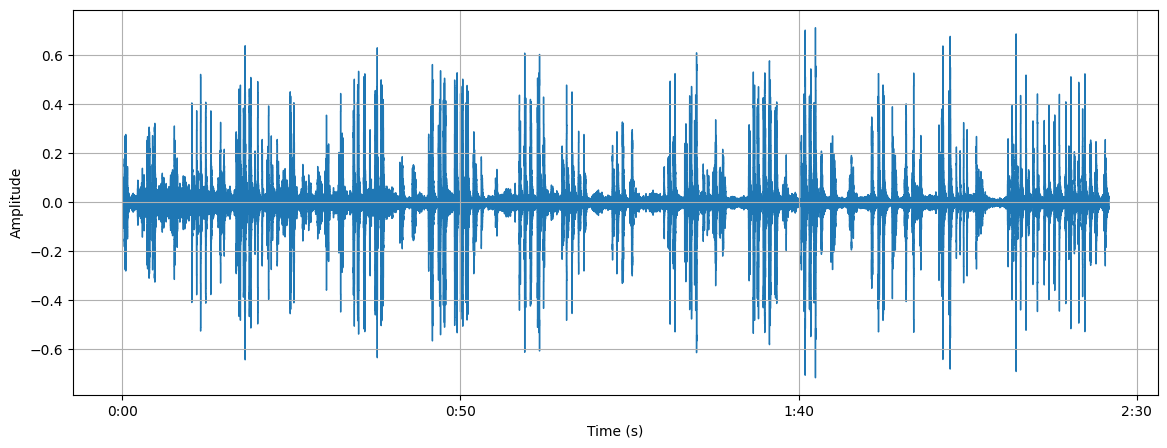

In [32]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14,5))
#plot the waveform
#plt.plot(audio_file) this line also correct
librosa.display.waveshow(audio_file,sr=sample_rate)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

<ipython-input-7-f6431ded6e86>:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  a_to_db=librosa.amplitude_to_db(D,ref=np.max)


(1025, 12563) (1025, 12563)


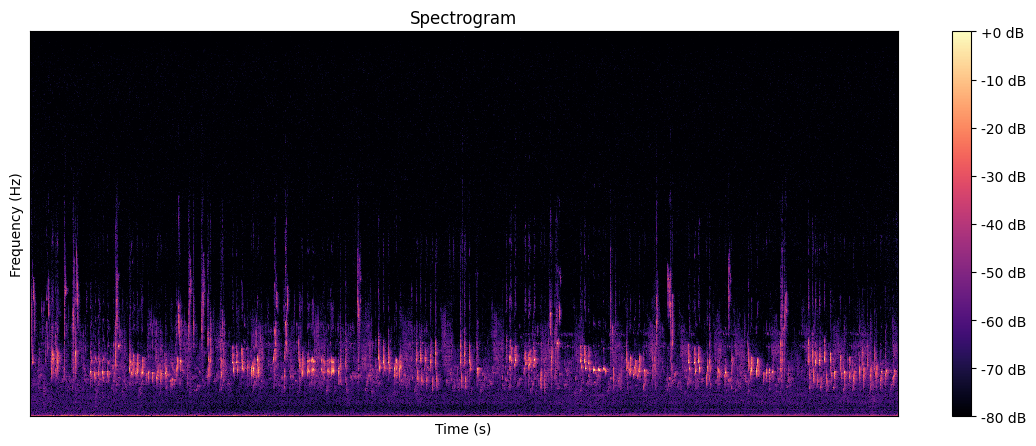

In [ ]:
import numpy as np

# #Compute the Short-Time Fourier Transform( STFT) use this to analyze how the frequency content of a signal changes over time
D= librosa.stft(audio_file)
# Convert the amplitude to dB
a_to_db=librosa.amplitude_to_db(D,ref=np.max)
print(D.shape,a_to_db.shape)
plt.figure(figsize=(14, 5))
# plot the spectrogram
librosa.display.specshow(a_to_db)

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

Now we are going to extract some audio features

the zero crossing rate indicates the number of times the amplitude of the signal crosses zero per unit of time.
 It is a useful feature for describing characteristics of the signal such as its pitch.

padding typically refers to adding extra values to the beginning or end of an audio signal to handle edge effects during analysis.

to print entire array - np.set_printoptions(threshold=np.inf)

[[0.01757812 0.03759766 0.06591797 ... 0.09277344 0.07470703 0.05566406]]


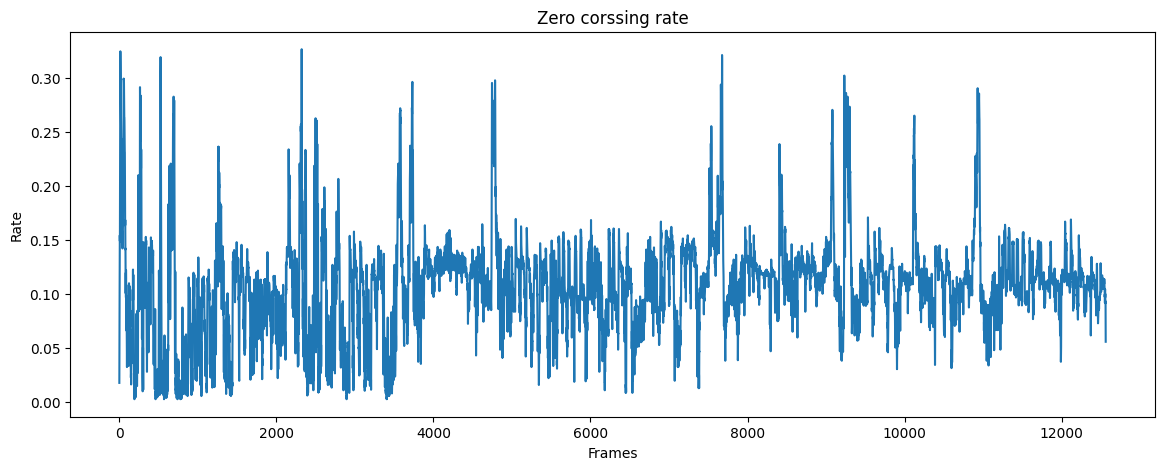

In [ ]:
# zero crossing rate
#librosa.feature.zero_crossing_rate(y, *, frame_length=2048, hop_length=512, center=True, **kwargs)
zero_cross=librosa.feature.zero_crossing_rate(audio_file,frame_length=2048,hop_length=512)

print(zero_cross) # it is 2D array
plt.figure(figsize=(14,5))
# plot zero crossing rate
plt.plot(zero_cross[0])

plt.title("Zero crossing rate")
plt.xlabel('Frames')
plt.ylabel('Rate')
plt.show()

librosa.feature.spectral_centroid(*, y=None, sr=22050, S=None, n_fft=2048, hop_length=512, freq=None, win_length=None, window='hann', center=True, pad_mode='constant') S is magnitude of spectogram.
n_fft refers to the number of points used in the Discrete Fourier Transform (DFT).

spectral_centroids.shape(6282,)
frames size : 6282
 time values size:6282


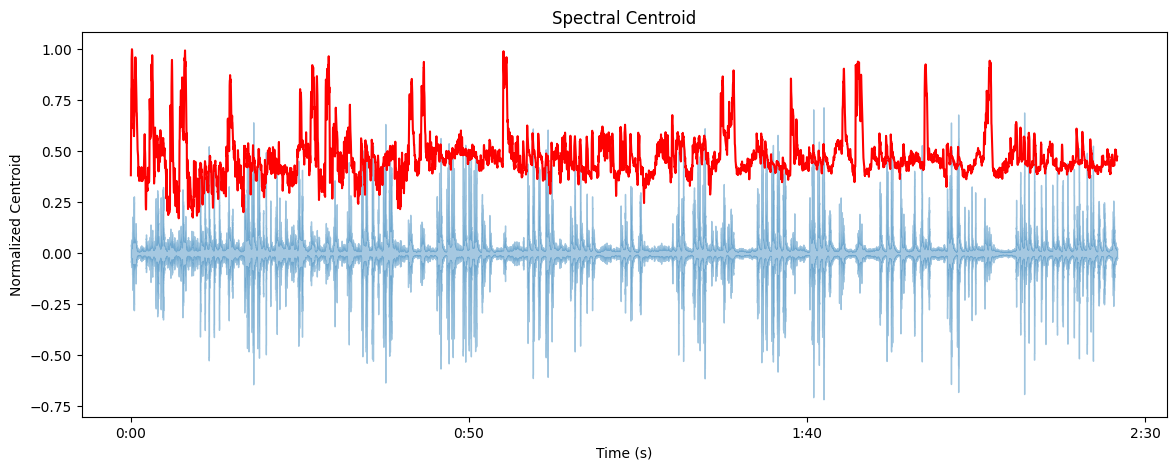

In [38]:
# spectral centroids
spectral_centroids=librosa.feature.spectral_centroid(y=audio_file,sr=sample_rate)[0]
#spectral_centroids = librosa.feature.spectral_centroid(y=audio_file, sr=sample_rate)[0]

print(f'spectral_centroids.shape{spectral_centroids.shape}')

# we have the code to plot spectral centroids for u
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
print(f'frames size : {len(frames)}\n time values size:{len(t)}')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(audio_file, sr=sample_rate, alpha=0.4)
plt.plot(t, librosa.util.normalize(spectral_centroids), color='r')
plt.title('Spectral Centroid')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Centroid')
plt.show() #follow us, spectral chords)


mfcc of a signal is a set of features (10-20) describes overall spectral envelop

(20, 6282)
[[-361.3631     -276.93884    -249.88214    ... -330.7557
  -331.29605    -351.70593   ]
 [  73.80453      43.03494      -1.046159   ...   62.126694
    54.955956     55.95509   ]
 [ -42.252895    -40.832317    -15.680498   ...  -50.922546
   -52.256294    -45.320263  ]
 ...
 [   8.207853      9.641414      9.969854   ...   10.299591
     9.885443      7.0700607 ]
 [  -1.4814847    -0.5018682     3.276384   ...    6.379819
     2.7079904    -0.61662716]
 [  -1.8247722    -5.370655     -2.3891509  ...    1.8289189
    -0.42625457   -2.125887  ]]


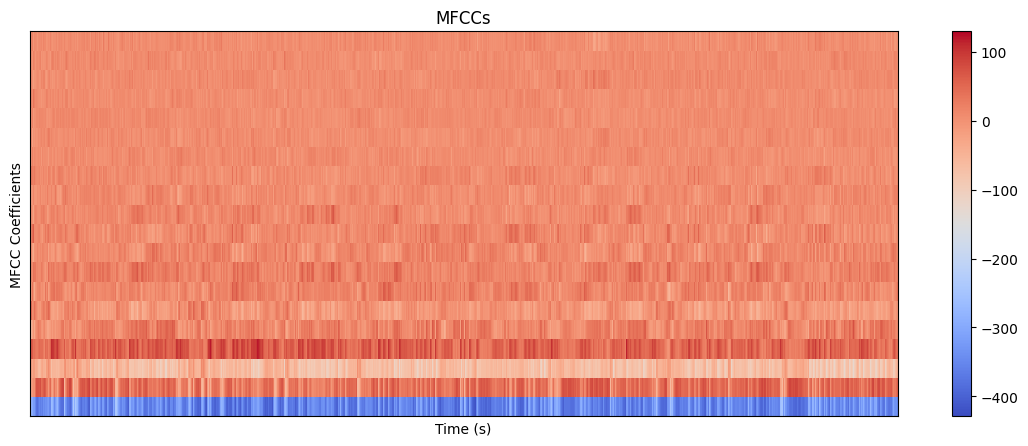

In [40]:
# MeI-Frequency cepstral coefficients(mfccs)
mfccs=librosa.feature.mfcc(y=audio_file,sr=sample_rate)
print(mfccs.shape)
print(mfccs)
plt.figure(figsize=(14, 5))
# Plot MFCCs
librosa.display.specshow(mfccs,sr=sample_rate)
plt.colorbar()
plt.title('MFCCs')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()



Stretch factor. If rate > 1, then the signal is sped up. If rate < 1, then the signal is slowed down.

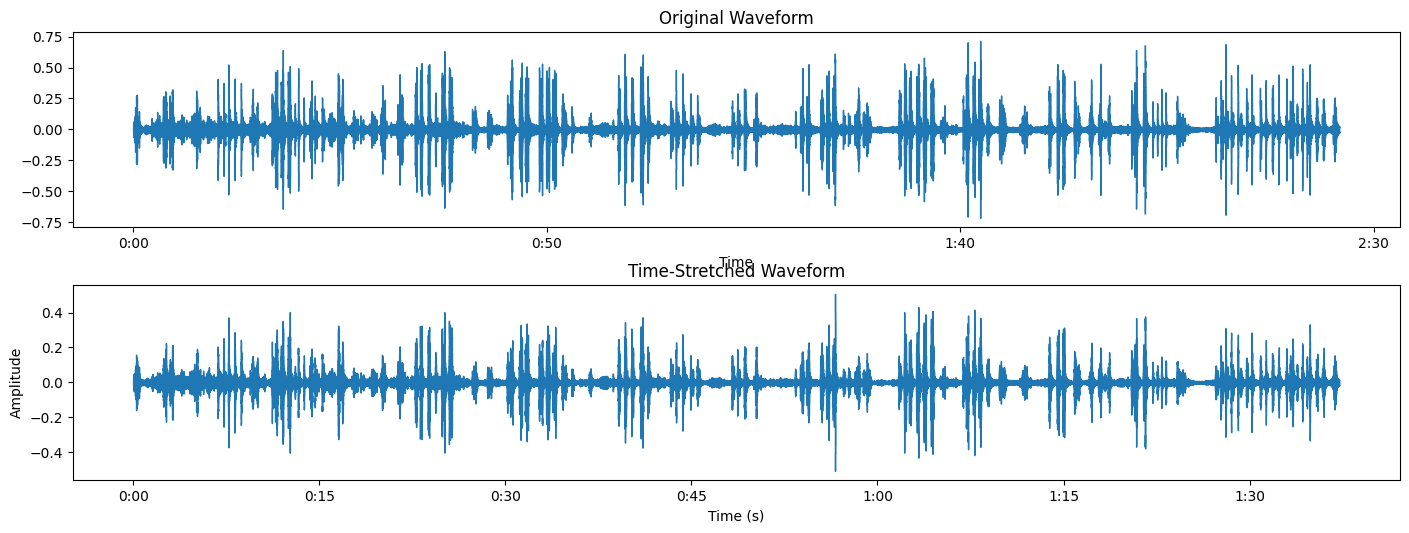

In [43]:
# Time-stretching the audio
y_stretched = librosa.effects.time_stretch(y=audio_file,rate=1.5)

# Plot original and time-stretched waveform
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_file, sr=sample_rate)
plt.title('Original Waveform')
plt.tight_layout()
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_stretched, sr=sample_rate)
plt.title('Time-Stretched Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


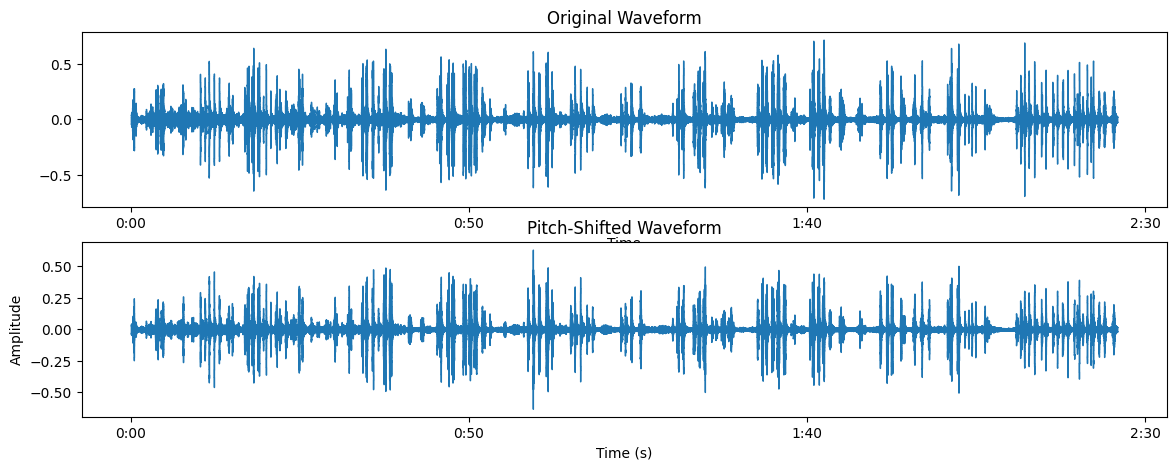

In [45]:
# Pitch shifting the audio
y_shifted=librosa.effects.pitch_shift(y=audio_file,sr=sample_rate,n_steps=10)

# Plot original and pitch-shifted waveform
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_file, sr=sample_rate)
plt.title('Original Waveform')
plt.subplot(2, 1, 2)
librosa.display.waveshow(y_shifted, sr=sample_rate)
plt.title('Pitch-Shifted Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
